# Otto Group Product Classification Challenge

## About the competition

For the [Otto Group Product Classification Challenge](https://www.kaggle.com/c/otto-group-product-classification-challenge), 
hosted by Kaggle, we have provided a dataset with 93 features for more 
than 200,000 products. The objective is to build a predictive model which 
is able to distinguish between our main product categories.



![competition graph](https://kaggle2.blob.core.windows.net/competitions/kaggle/4280/media/Grafik.jpg)

# Data understanding

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from IPython.display import Image

In [4]:
train = pd.read_csv('./train.csv', index_col='id')
test = pd.read_csv('./test.csv', index_col='id')
train.target

id
1        Class_1
2        Class_1
3        Class_1
4        Class_1
5        Class_1
6        Class_1
7        Class_1
8        Class_1
9        Class_1
10       Class_1
11       Class_1
12       Class_1
13       Class_1
14       Class_1
15       Class_1
16       Class_1
17       Class_1
18       Class_1
19       Class_1
20       Class_1
21       Class_1
22       Class_1
23       Class_1
24       Class_1
25       Class_1
26       Class_1
27       Class_1
28       Class_1
29       Class_1
30       Class_1
          ...   
61849    Class_9
61850    Class_9
61851    Class_9
61852    Class_9
61853    Class_9
61854    Class_9
61855    Class_9
61856    Class_9
61857    Class_9
61858    Class_9
61859    Class_9
61860    Class_9
61861    Class_9
61862    Class_9
61863    Class_9
61864    Class_9
61865    Class_9
61866    Class_9
61867    Class_9
61868    Class_9
61869    Class_9
61870    Class_9
61871    Class_9
61872    Class_9
61873    Class_9
61874    Class_9
61875    Class_9
61876    Cl

In [5]:
le = LabelEncoder()
train['target'] = le.fit_transform(train['target'])

print(train.shape, test.shape)

(61878, 94) (144368, 93)


In [6]:
train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [7]:
test.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
2,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
3,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
5,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


In [8]:
train.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,...,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135,3.842335
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,...,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720,2.510794
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000,...,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000,8.000000


In [9]:
zeros_ids_train = train.apply(lambda s : s.value_counts().get(0,0), axis=1)
print('frequency of zeros in train: {0}'.format(zeros_ids_train.sum()/(train.shape[1]*train.shape[0])))

frequency of zeros in train: 0.7853076369217946


In [10]:
test.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,...,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000
mean,0.386201,0.263597,0.899819,0.780727,0.071498,0.026439,0.200169,0.667378,1.035271,0.268778,...,0.074989,0.538485,1.128782,0.405249,0.875526,0.473284,0.814010,0.271161,0.388348,0.132675
std,1.468882,1.261908,2.949106,2.846181,0.428568,0.228354,1.069235,2.286832,3.548618,1.187347,...,1.288595,1.906121,2.682511,1.631566,2.090288,1.617853,4.603653,2.073627,1.006935,1.302695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,64.000000,45.000000,84.000000,82.000000,14.000000,11.000000,44.000000,100.000000,47.000000,59.000000,...,132.000000,56.000000,73.000000,54.000000,37.000000,62.000000,119.000000,74.000000,22.000000,91.000000


In [11]:
zeros_ids_test = test.apply(lambda s : s.value_counts().get(0,0), axis=1)
print('frequency of zeros in test: {0}'.format(zeros_ids_test.sum()/(test.shape[1]*test.shape[0])))

frequency of zeros in test: 0.7923605326411953


### Histograms of features

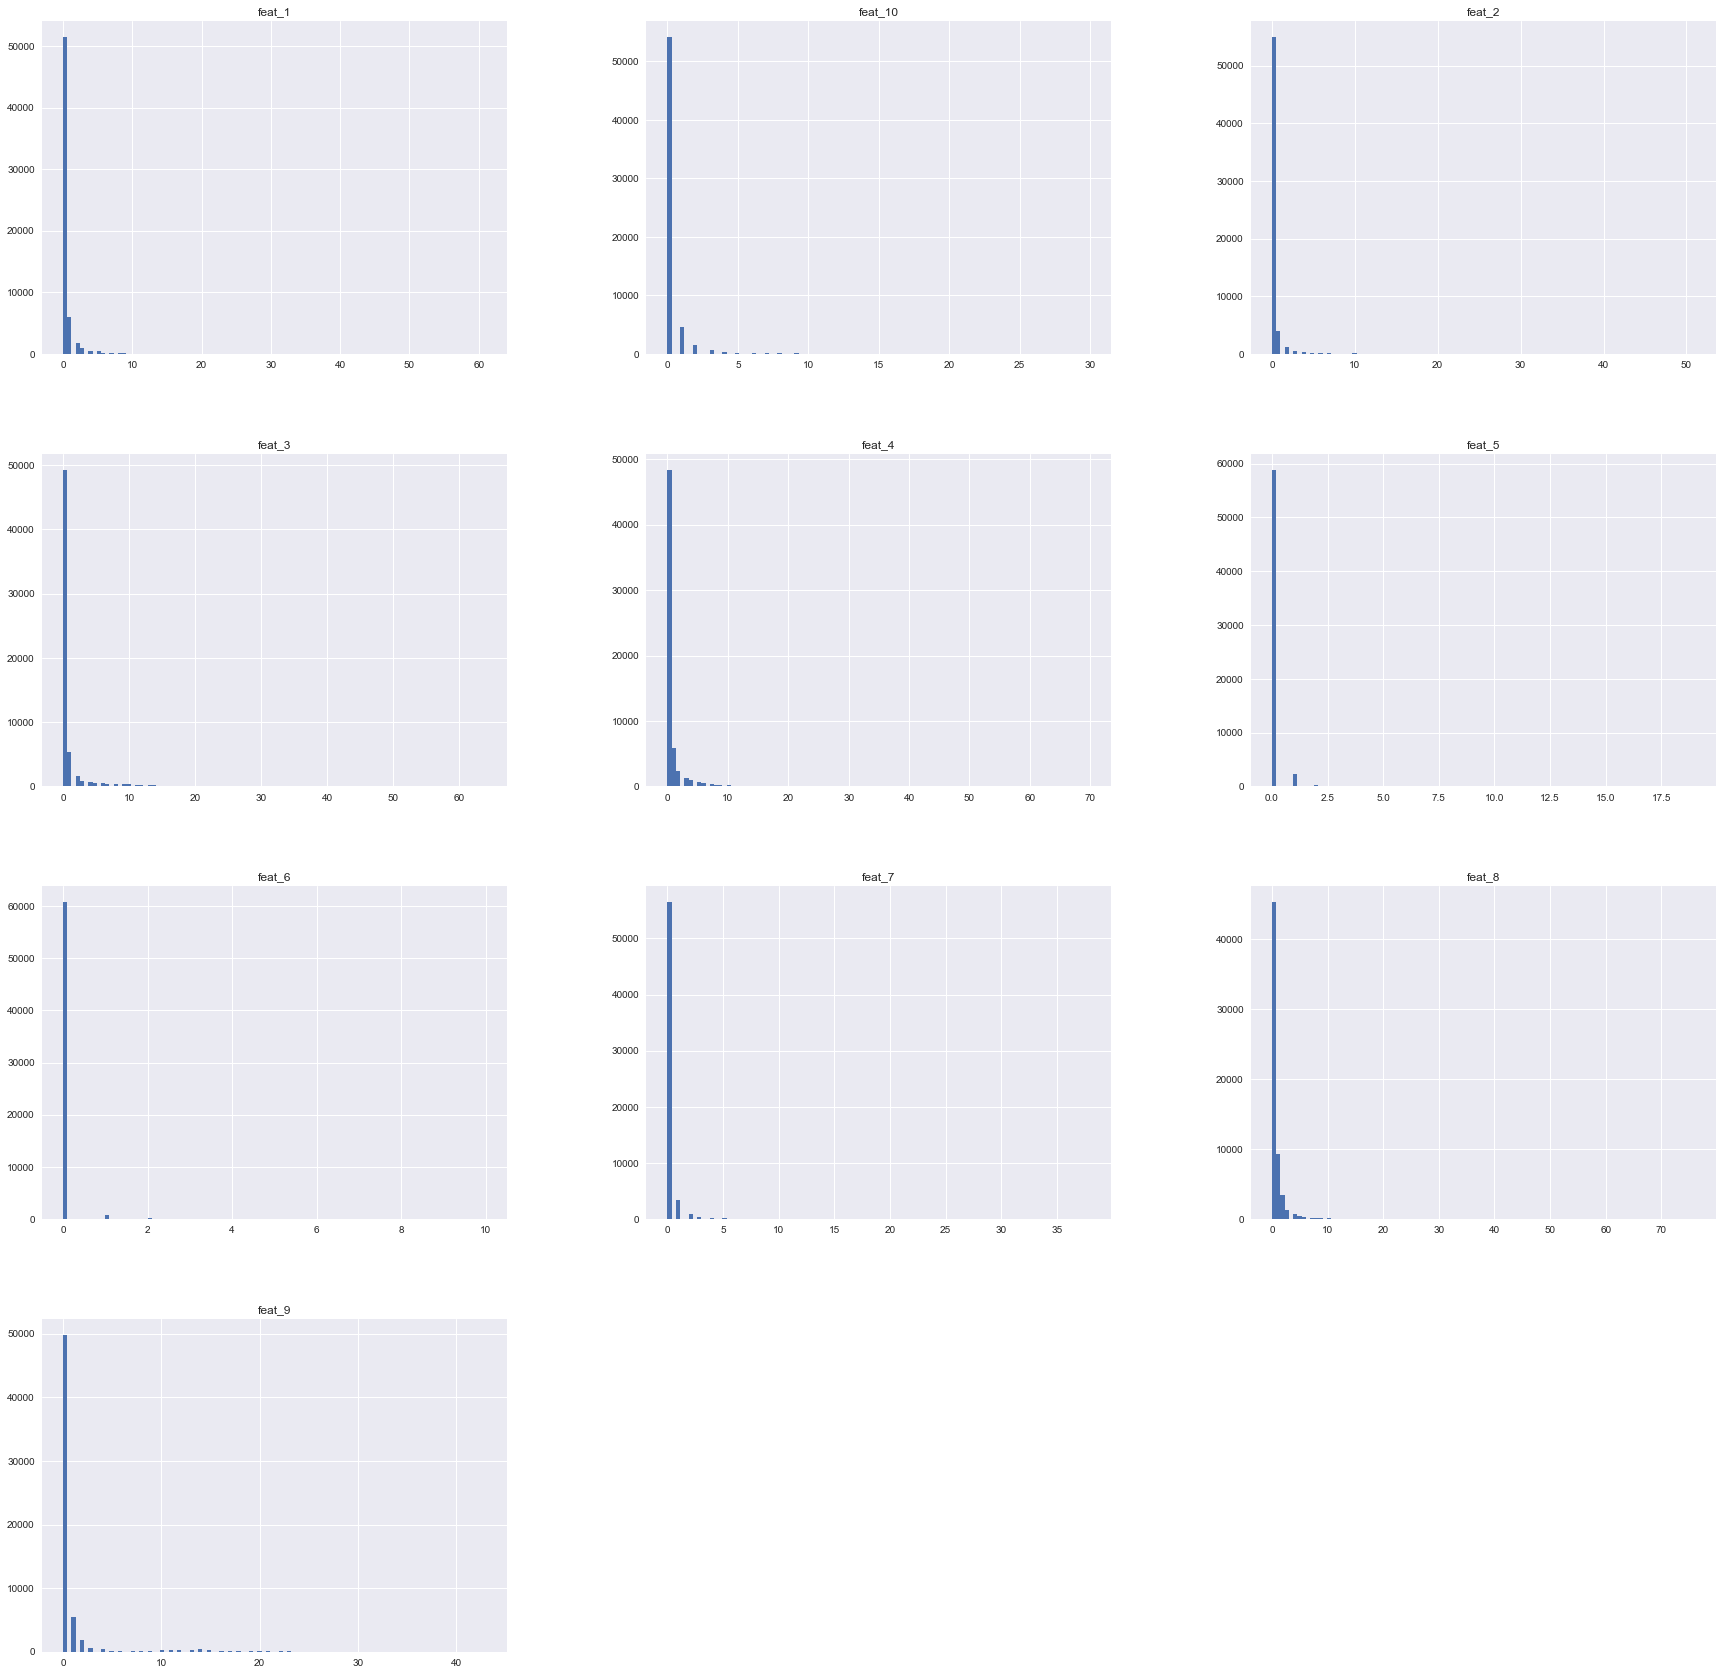

In [19]:
train[train.columns[:10]].hist(bins=100, figsize=(30,30))
plt.savefig("./images/train_hists.png", dpi=300)

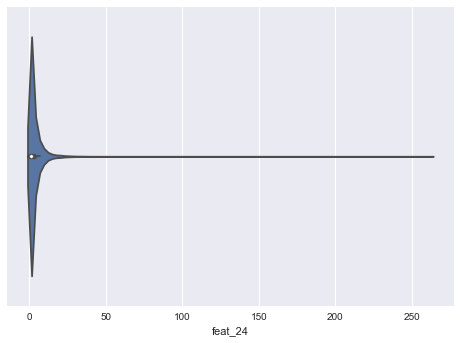

In [13]:
sns.violinplot(train[train.columns[23]])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


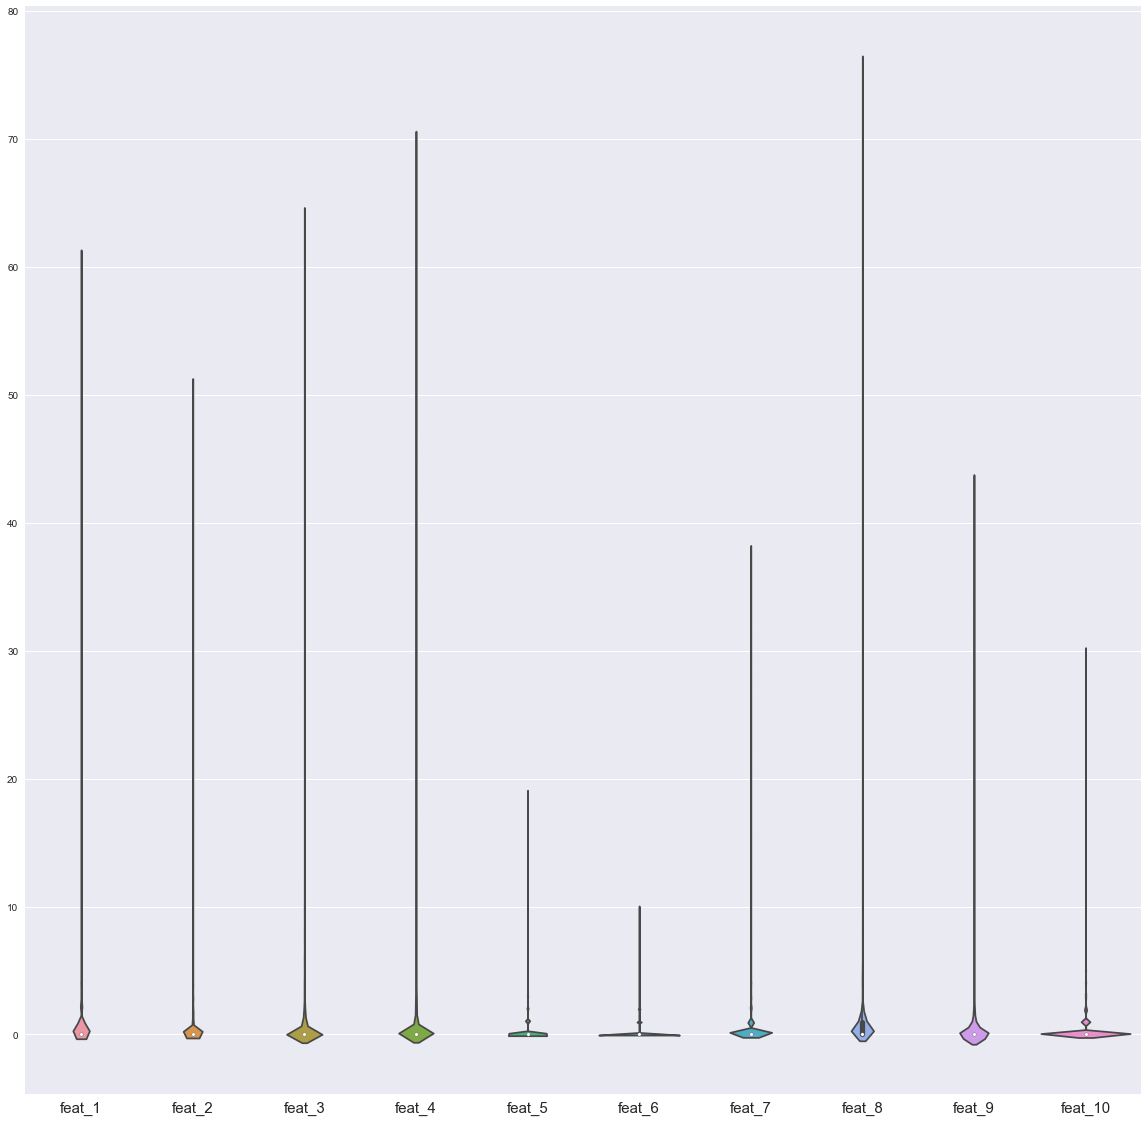

In [27]:
plt.figure(figsize=(20, 20))
g = sns.violinplot(train[train.columns[:10]])
plt.xticks(fontsize=15);

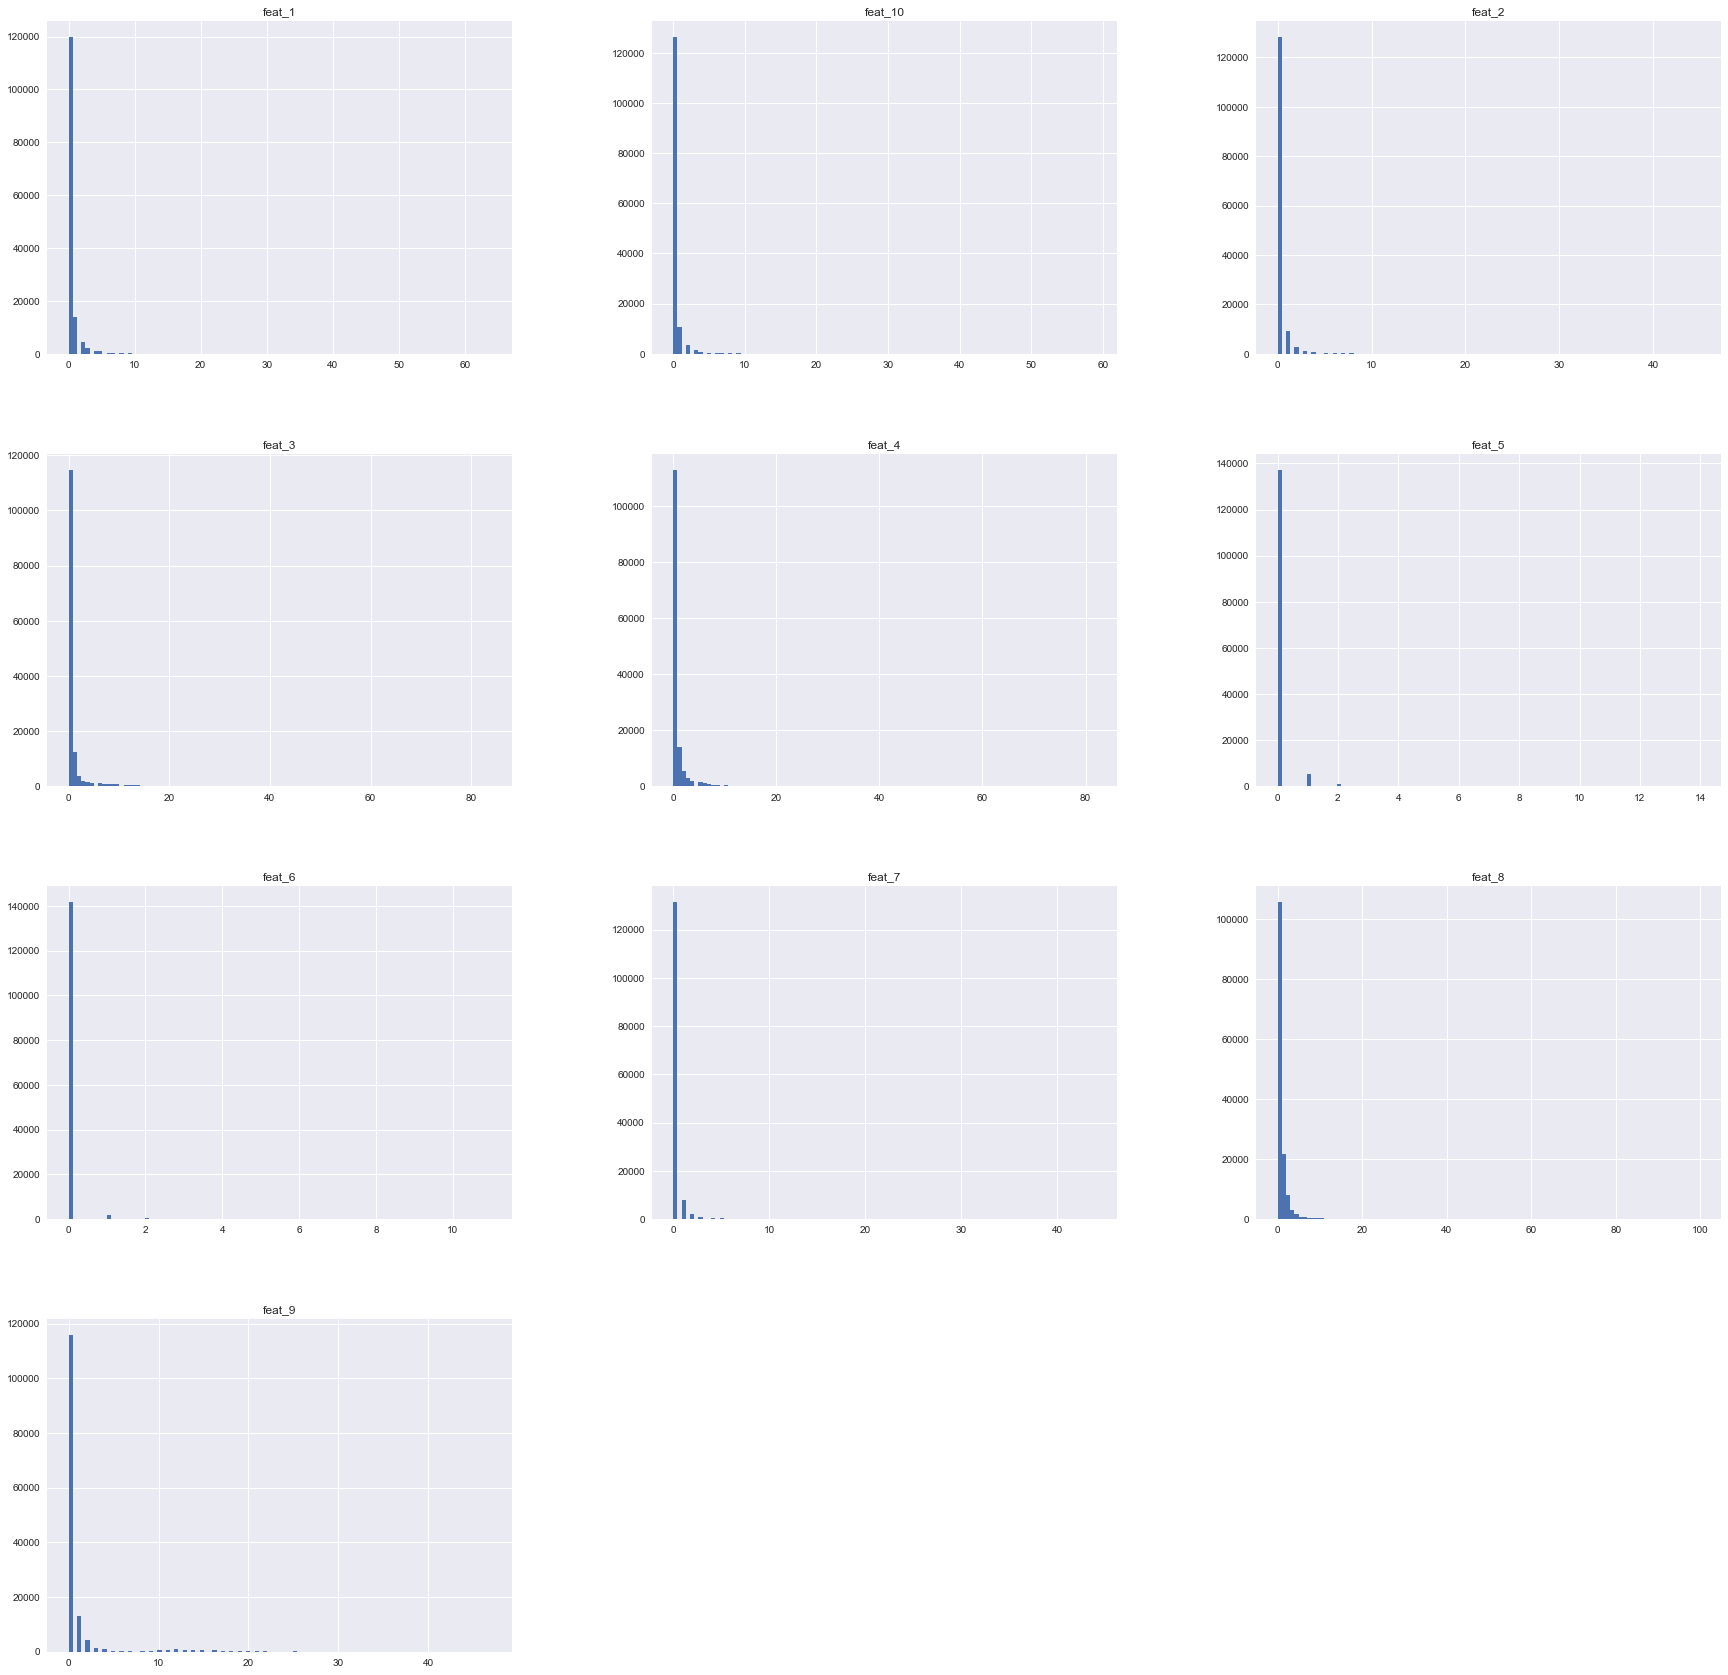

In [18]:
test[test.columns[:10]].hist(bins=100, figsize=(30,30))
plt.savefig("./images/test_hists.png", dpi=300)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


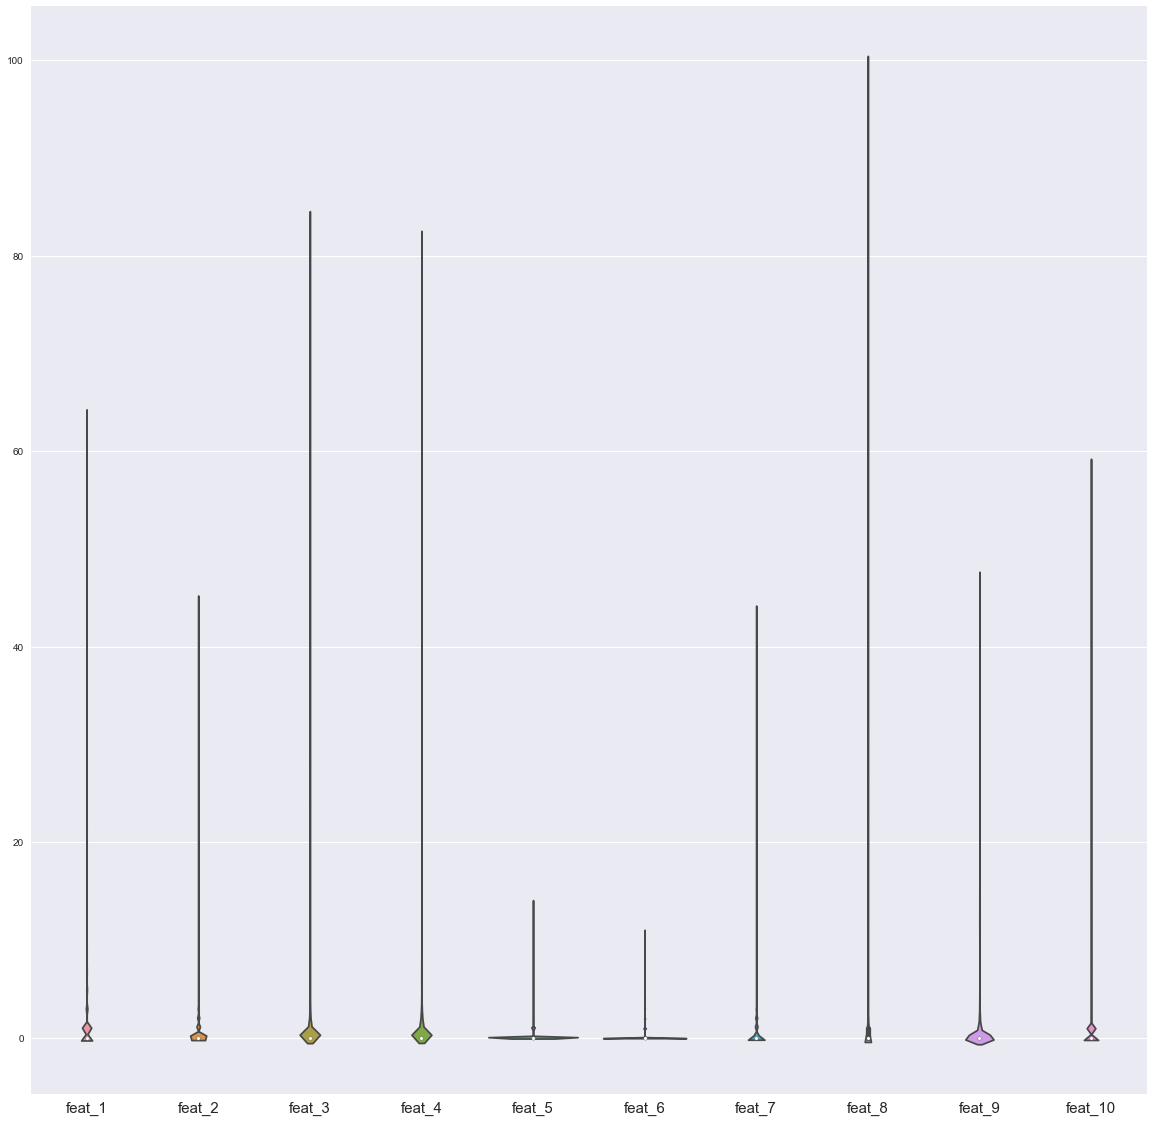

In [26]:
plt.figure(figsize=(20, 20))
g = sns.violinplot(test[test.columns[:10]])
plt.xticks(fontsize=15);

### Correlations of features

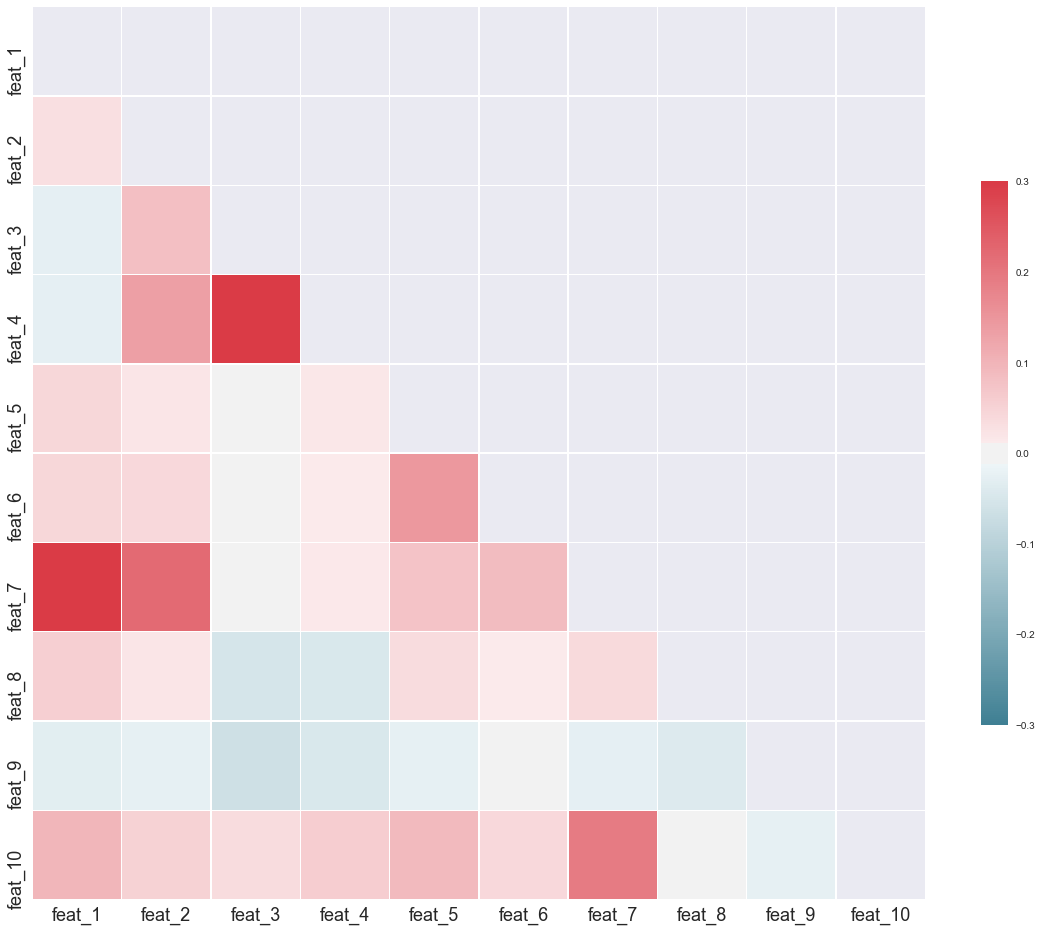

In [31]:
corr = train[train.columns[:10]].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

# Evaluation metric understanding

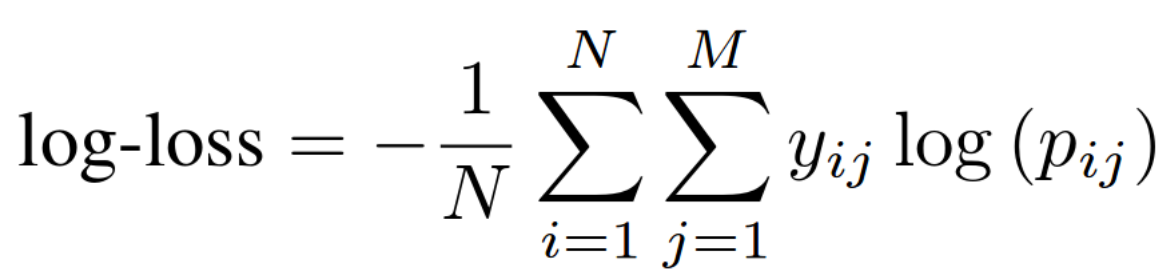

In [32]:
Image(filename="./addition/log_loss_formula.png", width=700, height=700)

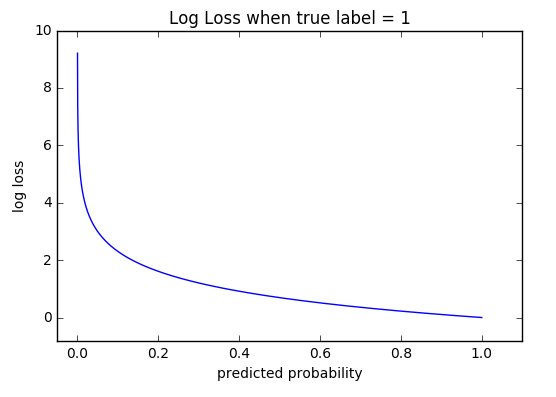

In [33]:
Image(filename="./addition/log_loss_plot.png", width=700, height=700)

#### What was missed from the data analysis:
1. We didn't analyze how does ids influence on the target. Need to perform correlations between target/features and ids, find some relationships among them.
2. Outlayer elimination.